# Lightcurve inspection for determining X-ray state

This notebook is used to open Swift/BAT and MAXI ligthcurve data to estimate if the object is in the hard of soft state during our observations when that is unknown. Swift/BAT observes mostly hard photons, while MAXI observes mostly soft photons. Thus, comparing both lightcurves indicates the X-ray binary state. 

Author: Iris Reitsma 


In [1]:
"""
Importing all libraries needed.
"""


from astropy.io import ascii
from astropy.time import Time

import matplotlib.pyplot as plt

In [6]:
""" 
Defining parameters and importing the Swift/BAT and MAXI ligthcurve data.

PARAMETERS to be set by the user:
- source: name of the XRB. Needs to match the correspondng directory name;
- date: date of the NIR observation
- bat_flname: insert filename of the BAT lightcurve data
- maxi_flname: insert filename of the MAXI ligthcurve data
"""

source = "2S_0918-549" 
date = '2018-11-13' # YYYY MM DD
filepath = "E:/Scriptie/Spectra/Hardness_state/" + source
bat_flname = filepath + "/" + "2S0918-549.lc.txt"
maxi_flname = filepath + "/" +  "J0920-552_g_lc_maxi.dat"

t = Time(date, scale='utc')
data_BAT = ascii.read(bat_flname)  
data_maxi = ascii.read(maxi_flname)  
figname_state = filepath + '/' + source + "_statefig.png"

print(data_maxi)    

  col1     col2     col3      col4   ...    col6     col7      col8     col9  
------- --------- -------- --------- ... --------- -------- --------- --------
55053.5 -0.070635 0.064823   0.01296 ... -0.028713 0.029074  -0.04503 0.041098
55054.5  0.007401 0.022507  0.001598 ... -0.001205 0.010138  0.007207 0.013933
55055.5  0.027204 0.018087  0.017925 ...  0.000396 0.008017  0.011665 0.011176
55056.5  0.022461 0.013924   0.01156 ...  0.004717 0.006383  0.005847 0.008825
55057.5   0.01553 0.009758  0.003117 ... -0.000796 0.004252  0.012445 0.006503
55058.5  0.010195 0.009829  0.012868 ...  0.000819 0.004291  0.000502 0.006536
55059.5  0.008996 0.009622  0.008189 ...  0.003798 0.004301 -0.001638 0.006407
55060.5  0.025152   0.0097   0.01366 ...  0.004357 0.004334  0.007607 0.006442
55061.5   0.03328 0.009958  0.016579 ...  0.005775 0.004365   0.01209 0.006678
55062.5 -0.001565 0.010762  0.003537 ... -0.004611 0.004731  0.002159 0.007354
    ...       ...      ...       ... ...       ...  

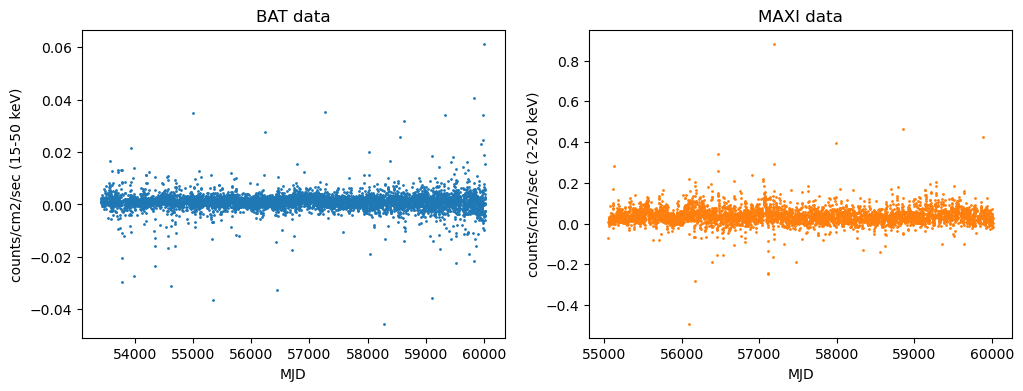

In [7]:
""" 
Plot both lightcurves separately
"""

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(data_BAT[ 'col1'], data_BAT['col2'], 'o', ms=1, label='BAT')
ax2.plot(data_maxi[ 'col1'], data_maxi['col2'], 'o', ms=1, color='C1', label='MAXI')
ax1.set_title('BAT data')
ax2.set_title('MAXI data')
ax1.set_ylabel('counts/cm2/sec (15-50 keV)')
ax1.set_xlabel('MJD')
ax2.set_ylabel('counts/cm2/sec (2-20 keV)')
ax2.set_xlabel('MJD')
plt.show()

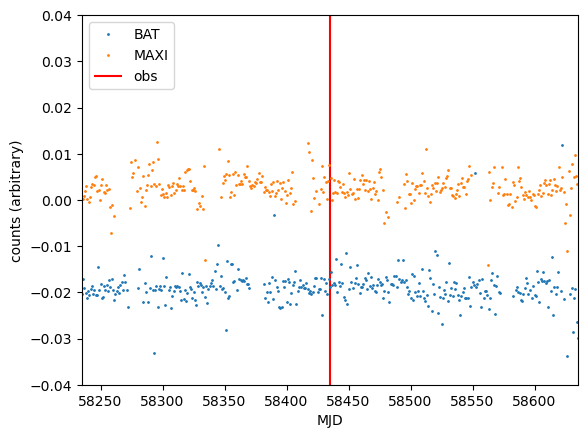

In [14]:
""" 
Plot both lightcurves together, also with the time of NIR observation.
Because the lightcurves are on different scales, we need to rescale them 
for a good comparison.
"""

# Set the parameters for plotting (boundaries, normalization)
x_up = t.mjd + 200
x_low = t.mjd - 200
y_up = 0.04
y_low = -0.04
norm = 10

# Plot the lightcurves and observation day
plt.plot(data_BAT[ 'col1'], data_BAT['col2']-0.02, 'o', ms=1, label='BAT')
plt.plot(data_maxi[ 'col1'], data_maxi['col2']/norm, 'o', ms=1, color='C1', label='MAXI')
plt.ylim(y_low, y_up)
plt.xlim(x_low, x_up)
plt.vlines(t.mjd, y_low, y_up, 'Red', label='obs')
plt.legend(loc='upper left')
plt.ylabel('counts (arbitrary)')
plt.xlabel('MJD')
plt.savefig(figname_state)
plt.show()